In [42]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
%matplotlib notebook


# Electron orbitals vis
- for every point in mesh calculate given func
- for filter dots with func val in A-eps A+eps
- interpolate func with them
- drop more dots
- visualize

## interpolation and visualisation testing


In [144]:

def f(x, y):
    return np.sin(x+y)*np.cos(y) 
x = np.linspace(1, 4, 4)
y = np.linspace(1, 4, 5)
X,Y = np.meshgrid(x, y, indexing='ij', sparse=True)
z = f(X,Y)

In [133]:
def f(x, y):
    return np.sin(x+y)*np.cos(y) 
x = np.linspace(1, 4, 4)
y = np.linspace(1, 4, 5)
X,Y = np.meshgrid(x, y, indexing='ij', sparse=True)
z = f(X,Y)

In [134]:
interp = RegularGridInterpolator((x, y),z)


<IPython.core.display.Javascript object>


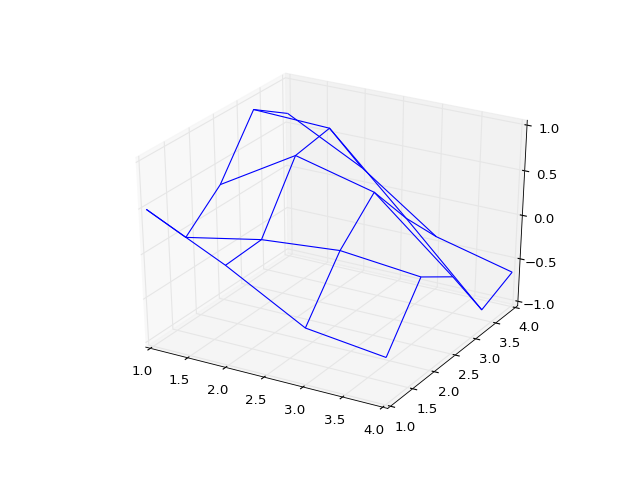

(4, 5)


In [135]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure(figsize=(8,6))
ax =fig.gca(projection='3d')

#gr = ax.plot_surface(X,Y,z,cmap=cm.coolwarm,linewidth=1)
gr = ax.plot_wireframe(X,Y,z)
ax.set_zlim(-1.01, 1.01)
print(z.shape)
# Add a color bar which maps values to colors.
#f.colorbar(gr, shrink=0.5, aspect=5)

In [196]:

x = np.linspace(1, 4, 20)
y = np.linspace(1, 4, 20)
X,Y = np.meshgrid(x, y, indexing='ij', sparse=True)
G = np.array(np.meshgrid(x, y, indexing='ij')).reshape(2,-1).T
fz = interp(G).reshape(20,20)
print(fz.shape,X.shape,Y.shape)

(20, 20) (20, 1) (1, 20)


In [197]:
from mpl_toolkits.mplot3d import axes3d
#X, Y, Z = axes3d.get_test_data(0.05)
print(X.shape,Y.shape,Z.shape)

(20, 1) (1, 20) (120, 120)


<IPython.core.display.Javascript object>


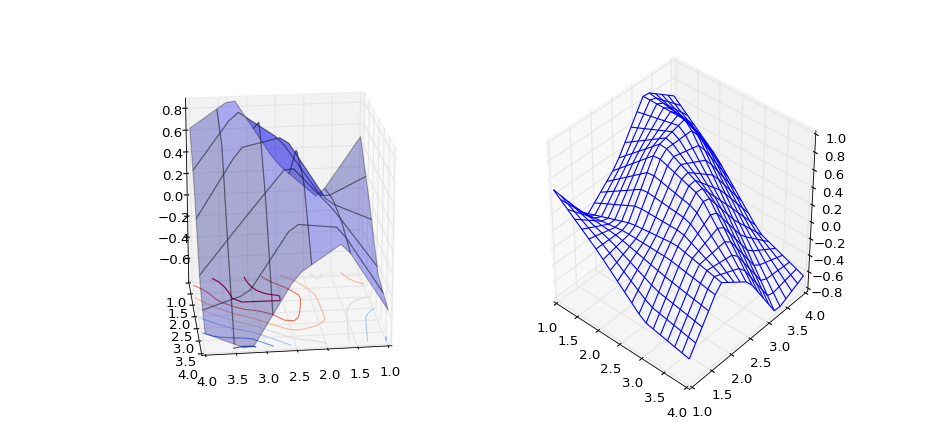

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [199]:
fig = plt.figure(figsize=(10,6))
ax0 =fig.add_subplot(1,2,2,projection='3d')

#gr = ax.plot_surface(X,Y,z,cmap=cm.coolwarm,linewidth=1)
gr = ax0.plot_wireframe(X,Y,fz)
ax=fig.add_subplot(1,2,1,projection='3d')
ax.plot_surface(Y, X, fz, rstride=4, cstride=4, alpha=0.3)
cset = ax.contour(x, y, fz, zdir='z', offset=np.min(fz), cmap=cm.coolwarm)
#cset = ax.contour(X.T, Y, fz, zdir='x', offset=-4, cmap=cm.coolwarm)
#cset = ax.contour(x, y, fz, zdir='y', offset=4, cmap=cm.coolwarm)

#gr = ax.contourf(x,y,fz)

<IPython.core.display.Javascript object>


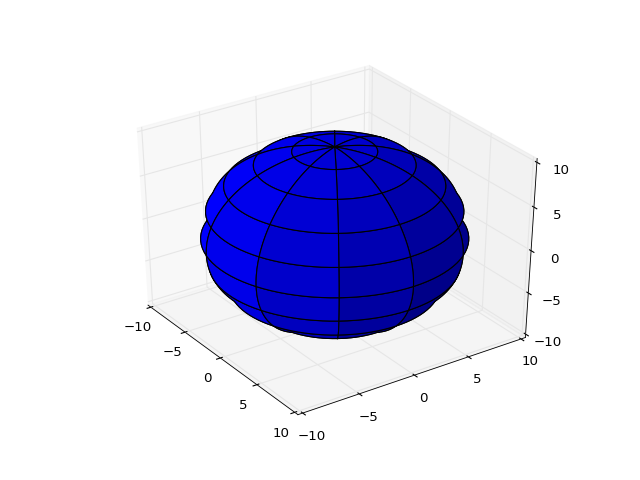

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Make data
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
# Plot the surface
ax.plot_surface(x, y, z, color='b')